In [1]:
import networkx
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch_geometric.nn import Node2Vec
from html_graph_lib import HTMLGraph, HTMLDoc, GraphPlotter

URL = 'https://www.qytera.de'
doc = HTMLDoc.from_url(URL)
G, colors = doc.get_graph(index_builder=HTMLGraph.numeric_index)

C:\Users\tilof\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\cuda\__init__.py:107: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ..\c10\cuda\CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
edge_index = torch.tensor(HTMLGraph.get_edge_index(G), dtype=torch.long)

### Construct the model

In [3]:
model = Node2Vec(
    edge_index,
    embedding_dim=2,
    walk_length=20,
    context_size=10,
    walks_per_node=10,
    num_negative_samples=1,
    p=1,
    q=1,
    sparse=True
)

loader = model.loader(batch_size=128, shuffle=True, num_workers=4)

In [4]:
optimizer = torch.optim.SparseAdam(model.parameters(), lr=1e-2)

def train():
    # Set model to training mode
    model.train()
    total_loss = torch.tensor(0.0, dtype=torch.float)
    for pos_rw, neg_rw, in loader:
        # Reset gradients of all parameters
        optimizer.zero_grad()
        loss = model.loss(pos_rw, neg_rw)
        loss.backward()
        optimizer.step()
        total_loss += loss
    return total_loss.item() / len(loader)

In [5]:
for epoch in range(25):
    loss = train()
    print(f"Epoch: {epoch:02d}, Loss: {loss:.4f}")

Epoch: 00, Loss: 1.2336
Epoch: 01, Loss: 1.1886
Epoch: 02, Loss: 1.1493
Epoch: 03, Loss: 1.1189
Epoch: 04, Loss: 1.0911
Epoch: 05, Loss: 1.0684
Epoch: 06, Loss: 1.0455
Epoch: 07, Loss: 1.0268
Epoch: 08, Loss: 1.0103
Epoch: 09, Loss: 0.9951
Epoch: 10, Loss: 0.9802
Epoch: 11, Loss: 0.9676
Epoch: 12, Loss: 0.9581
Epoch: 13, Loss: 0.9488
Epoch: 14, Loss: 0.9407
Epoch: 15, Loss: 0.9343
Epoch: 16, Loss: 0.9270
Epoch: 17, Loss: 0.9225
Epoch: 18, Loss: 0.9166
Epoch: 19, Loss: 0.9138
Epoch: 20, Loss: 0.9109
Epoch: 21, Loss: 0.9077
Epoch: 22, Loss: 0.9056
Epoch: 23, Loss: 0.9032
Epoch: 24, Loss: 0.9004


In [6]:
import numpy as np
z = model(torch.arange(edge_index.shape[1]+1)).detach().cpu().numpy()
z

array([[-0.4570328 , -0.01154542],
       [-0.11803465,  0.01702576],
       [-0.67166704,  1.1000091 ],
       ...,
       [ 0.7947215 ,  0.9755365 ],
       [ 0.8751856 , -1.1250303 ],
       [-1.4126861 ,  0.4982179 ]], dtype=float32)

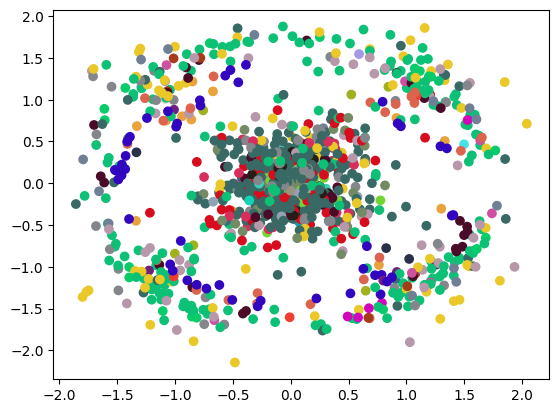

In [7]:
fix, ax = plt.subplots(1, 1)
ax.scatter(z[:, 0], z[:, 1], c=colors)

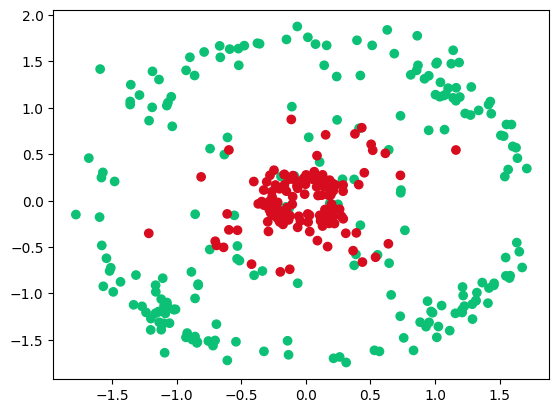

In [8]:
colors = np.array(colors)
unique_colors = np.unique(colors)
i = 2
fix, ax = plt.subplots(1, 1)
ax.scatter(z[colors == unique_colors[i], 0], z[colors == unique_colors[i], 1], c=colors[colors == unique_colors[i]])
i=29
ax.scatter(z[colors == unique_colors[i], 0], z[colors == unique_colors[i], 1], c=colors[colors == unique_colors[i]])